In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import os

raw_fault_dir = r'faults/'
fault_mask_dir = r'fault_masks/'
raw_seismic_dir = r'seismics1/'
overlay_output_dir = 'overlay'

os.makedirs(fault_mask_dir, exist_ok=True)
os.makedirs(overlay_output_dir, exist_ok=True)

In [8]:
for name in os.listdir(raw_fault_dir):
    filename = name.split('.')[0]

    try:
        img = cv2.imread(os.path.join(raw_fault_dir, name))
    except Exception as e:
        print(f"Error reading image {name}: {str(e)}")
        continue

    if img is None:
        print(f"Image {name} is empty or corrupted")
        continue

    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    binary_image = cv2.bitwise_not(binary_image)
    binary_mask = binary_image // 255
    np.save(os.path.join(fault_mask_dir, filename + '.npy'), binary_mask)

In [10]:
for name in os.listdir(raw_seismic_dir):
    filename = os.path.splitext(name)[0].split('-')[-1]
    seismic_path = os.path.join(raw_seismic_dir, name)
    fault_mask_dir = os.path.join(fault_mask_dir, f"seismic-{filename}.npy")

    if not os.path.exists(fault_mask_dir):
        print(f"Warning: No fault mask found for {filename}. Skipping.")
        continue

    img = cv2.imread(seismic_path)
    fault_mask = np.load(fault_mask_dir)
    inverted_fault_mask = cv2.bitwise_not(fault_mask * 255)
    fault_mask_bgr = cv2.cvtColor(inverted_fault_mask, cv2.COLOR_GRAY2BGR)
    fault_mask_resized = cv2.resize(fault_mask_bgr, (img.shape[1], img.shape[0]))
    overlay = cv2.addWeighted(img, 0.5, fault_mask_resized, 0.5, 0)
    cv2.imwrite(os.path.join(overlay_output_dir, filename + "_overlay.png"), overlay)

print(f"Overlay process completed. Images saved to {overlay_output_dir}")

Overlay process completed. Images saved to overlay


In [13]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
binary_image = cv2.bitwise_not(binary_image)
binary_mask = binary_image // 255
mask_path = os.path.join(fault_mask_dir, f"{filename}.npy")
np.save(mask_path, binary_mask)
print(f"Binary mask saved for {name} at {mask_path}")

Binary mask saved for seismic-1284.png at seismics_fault/1284.npy


In [15]:
file_path = r'fault_masks/'

print("Loaded NumPy Array:")
print(binary_mask)

print("Shape:", binary_mask.shape)
print("Data Type:", binary_mask.dtype)

Loaded NumPy Array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape: (2664, 4166)
Data Type: uint8


In [16]:
for name in os.listdir(raw_fault_dir):
    filename = name.split('.')[0]

    try:
        img = cv2.imread(os.path.join(raw_fault_dir, name))
    except Exception as e:
        print(f"Error reading image {name}: {str(e)}")
        continue

    if img is None:
        print(f"Image {name} is empty or corrupted")
        continue

    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    binary_image = cv2.bitwise_not(binary_image)
    binary_mask = binary_image // 255

    np.save(os.path.join(fault_mask_dir, filename + '.npy'), binary_mask)

In [17]:
for name in os.listdir(raw_seismic_dir):
    filename = os.path.splitext(name)[0].split('-')[-1]
    seismic_path = os.path.join(raw_seismic_dir, name)
    fault_mask_path = os.path.join(fault_mask_dir, f"fault-{filename}.npy")

    if not os.path.exists(fault_mask_path):
        print(f"Warning: No fault mask found for {filename}. Skipping.")
        continue

    img = cv2.imread(seismic_path)
    fault_mask = np.load(fault_mask_path)
    inverted_fault_mask = cv2.bitwise_not(fault_mask * 255)
    fault_mask_bgr = cv2.cvtColor(inverted_fault_mask, cv2.COLOR_GRAY2BGR)
    fault_mask_resized = cv2.resize(fault_mask_bgr, (img.shape[1], img.shape[0]))
    overlay = cv2.addWeighted(img, 0.5, fault_mask_resized, 0.5, 0)
    cv2.imwrite(os.path.join(overlay_output_dir, filename + "_overlay.png"), overlay)

print(f"Overlay process completed. Images saved to {overlay_output_dir}")

Overlay process completed. Images saved to overlay


In [19]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
binary_image = cv2.bitwise_not(binary_image)

binary_mask = binary_image // 255

mask_path = os.path.join(fault_mask_dir, f"{filename}.npy")
np.save(mask_path, binary_mask)
print(f"Binary mask saved for {name} at {mask_path}")


Binary mask saved for seismic-1284.png at fault_masks/1284.npy


In [21]:
file_path = r'fault_masks/' 
binary_mask = np.load(file_path)

print("Loaded NumPy Array:")
print(binary_mask)

print("Shape:", binary_mask.shape)
print("Data Type:", binary_mask.dtype)

IsADirectoryError: [Errno 21] Is a directory: 'fault_masks/'

In [22]:
import os

def find_mismatched_files(seismic_folder, fault_folder):
    seismic_files = [int(f.split('-')[1].split('.')[0]) for f in os.listdir(seismic_folder) if f.endswith('.png')]
    fault_files = [int(f.split('-')[1].split('.')[0]) for f in os.listdir(fault_folder) if f.endswith('.png')]

    mismatched_fault_files = set(fault_files) - set(seismic_files)
    mismatched_seismic_files = set(seismic_files) - set(fault_files)

    if mismatched_fault_files:
        print("fault files without corresponding seismic files:")
        for file_id in mismatched_fault_files:
            print(f"fault-{file_id}.npy")
    else:
        print("No mismatched fault files found.")

    if mismatched_seismic_files:
        print("\nSeismic files without corresponding fault files:")
        for file_id in mismatched_seismic_files:
            print(f"seismic-{file_id}.png")
    else:
        print("No mismatched seismic files found.")

# Replace with your actual folder paths
seismic_folder =  r'seismics1/'
fault_folder =  r'faults/'
find_mismatched_files(seismic_folder, fault_folder)

fault files without corresponding seismic files:
fault-1208.npy
fault-1267.npy

Seismic files without corresponding fault files:
seismic-1189.png
seismic-1190.png
seismic-1193.png
seismic-1194.png
seismic-1195.png
seismic-1197.png
seismic-1214.png
seismic-1215.png
seismic-1217.png
seismic-1218.png
seismic-1219.png
seismic-1221.png
seismic-1222.png
seismic-1223.png
seismic-1229.png
seismic-1231.png
seismic-1233.png
seismic-1235.png
seismic-1237.png
seismic-1239.png
seismic-1241.png
seismic-1242.png
seismic-1243.png
seismic-1245.png
seismic-1246.png
seismic-1247.png
seismic-1249.png
seismic-1250.png
seismic-1251.png
seismic-1253.png
seismic-1254.png
seismic-1255.png
seismic-1257.png
seismic-1258.png
seismic-1259.png
seismic-1261.png
seismic-1262.png
seismic-1265.png
seismic-1277.png
seismic-1293.png
seismic-1294.png
seismic-1295.png
seismic-1297.png
seismic-1298.png
seismic-1299.png
seismic-1301.png
seismic-1302.png
seismic-1303.png
seismic-1305.png
seismic-1306.png
seismic-1307.png
seis

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
 
# Define the paths to your seismic and fault image folders
seismic_dir = r'seismics1/'
fault_dir = r'faults/'
 
# Function to load images 
def load_images(seismic_dir, fault_dir, limit=400, img_size=(256, 256)):
    seismic_images = []
    fault_masks = []
    # Get all seismic image filenames (assuming they are .png files)
    seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
    fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    # Iterate over the files and load them
    for seismic_file, fault_file in zip(seismic_files, fault_files):
        # Load seismic image and fault mask
        seismic_img_path = os.path.join(seismic_dir, seismic_file)
        fault_img_path = os.path.join(fault_dir, fault_file)
        # Load the seismic image (convert to grayscale if needed)
        seismic_img = image.load_img(seismic_img_path, target_size=img_size)
        seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        # Load the fault mask image (assuming binary mask)
        fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
        fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        seismic_images.append(seismic_img)
        fault_masks.append(fault_img)
    return np.array(seismic_images), np.array(fault_masks)
 
X, y = load_images(seismic_dir, fault_dir, limit=200, img_size=(256, 256))  # Resize to (64, 64)
 
# Check the shape of loaded data
print(f"Seismic images shape: {X.shape}")
print(f"Fault masks shape: {y.shape}")


Seismic images shape: (200, 256, 256, 3)
Fault masks shape: (200, 256, 256, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check the range of values in the seismic and fault images and visualize samples
def check_color_mapping(X, y, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i+1}:")
        
        # Get unique values in the fault mask
        unique_vals = np.unique(y[i])
        print(f"Fault Mask Unique Values: {unique_vals}")
        
        # Count pixels for each unique value
        for val in unique_vals:
            count = np.sum(y[i] == val)
            if val == 0:
                print(f" - {count} pixels correspond to 0 (black, background)")
            elif val == 1:
                print(f" - {count} pixels correspond to 1 (white, fault)")
        
        # Print range of values for seismic images
        print(f"Seismic Image Range: {X[i].min()} to {X[i].max()}")
        print(f"Fault Mask Range: {y[i].min()} to {y[i].max()}")
        print("-" * 50)

        # Optional: visualize seismic image and fault mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(X[i].squeeze(), cmap='gray')  # Seismic image
        plt.title("Seismic Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Fault mask
        plt.title("Fault Mask")
        plt.axis('off')
        
        plt.show()

# Example usage
check_color_mapping(X, y, num_samples=3)


Sample 1:
Fault Mask Unique Values: [0. 1.]
 - 62 pixels correspond to 0 (black, fault)
 - 65474 pixels correspond to 1 (white, background)
Seismic Image Range: 0.0 to 1.0
Fault Mask Range: 0.0 to 1.0
--------------------------------------------------


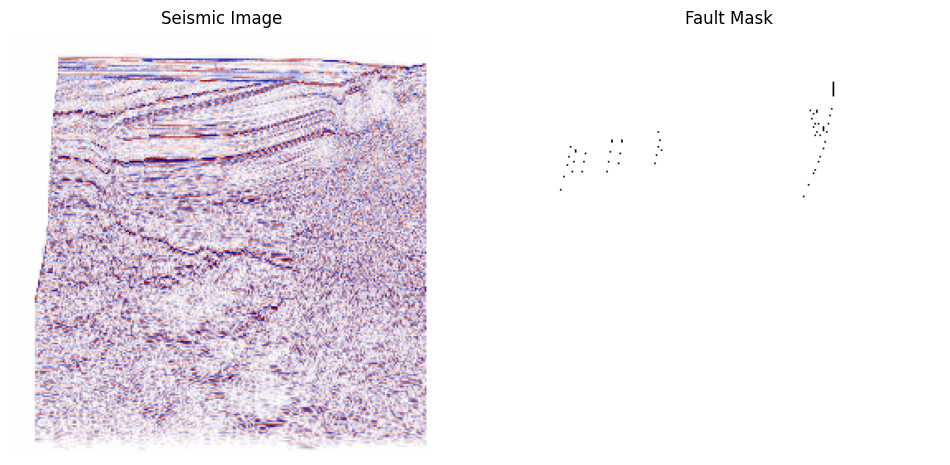

Sample 2:
Fault Mask Unique Values: [0. 1.]
 - 14 pixels correspond to 0 (black, fault)
 - 65522 pixels correspond to 1 (white, background)
Seismic Image Range: 0.0 to 1.0
Fault Mask Range: 0.0 to 1.0
--------------------------------------------------


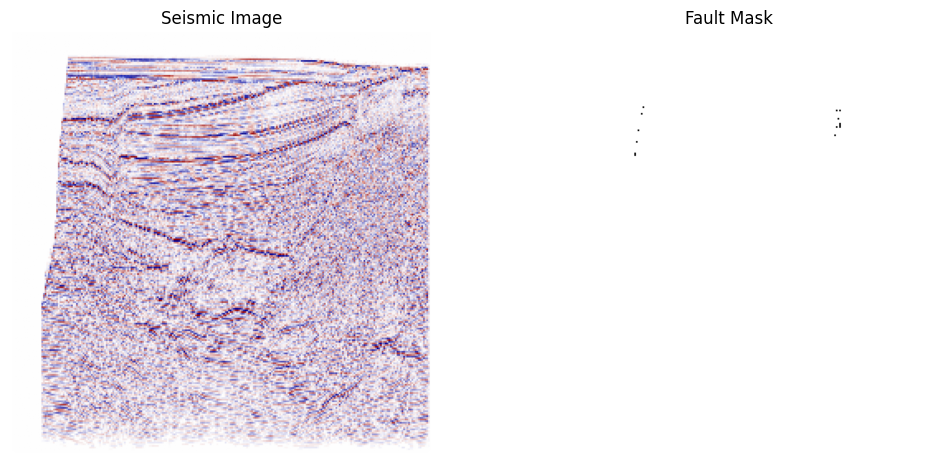

Sample 3:
Fault Mask Unique Values: [0. 1.]
 - 14 pixels correspond to 0 (black, fault)
 - 65522 pixels correspond to 1 (white, background)
Seismic Image Range: 0.0 to 1.0
Fault Mask Range: 0.0 to 1.0
--------------------------------------------------


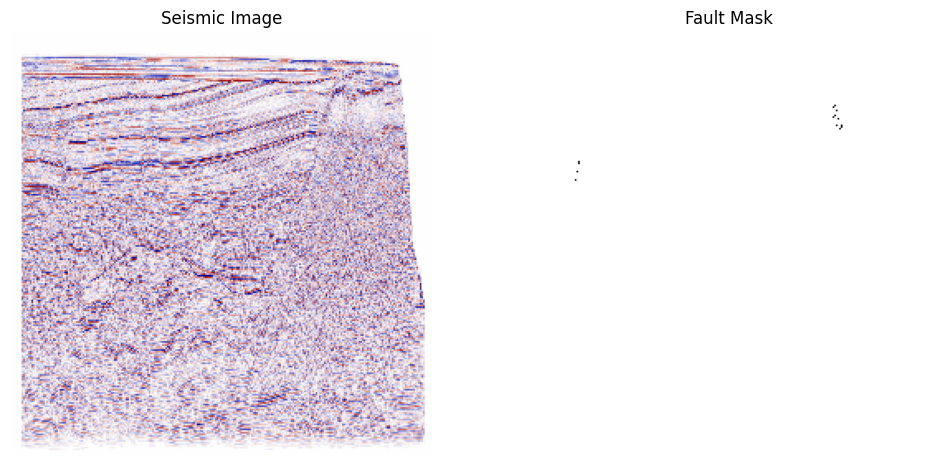

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check the range of values in the seismic and fault images and visualize samples
def check_color_mapping(X, y, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i+1}:")
        
        # Get unique values in the fault mask
        unique_vals = np.unique(y[i])
        print(f"Fault Mask Unique Values: {unique_vals}")
        
        # Count pixels for each unique value
        for val in unique_vals:
            count = np.sum(y[i] == val)
            if val == 0:
                print(f" - {count} pixels correspond to 0 (black, fault)")
            elif val == 1:
                print(f" - {count} pixels correspond to 1 (white, background)")
        
        # Print range of values for seismic images
        print(f"Seismic Image Range: {X[i].min()} to {X[i].max()}")
        print(f"Fault Mask Range: {y[i].min()} to {y[i].max()}")
        print("-" * 50)

        # Optional: visualize seismic image and fault mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(X[i].squeeze(), cmap='gray')  # Seismic image
        plt.title("Seismic Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Fault mask
        plt.title("Fault Mask")
        plt.axis('off')
        
        plt.show()

# Example usage
check_color_mapping(X, y, num_samples=3)


In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (160, 256, 256, 3)
Validation set size: (40, 256, 256, 3)


In [45]:
from tensorflow.keras import layers, models

def unet_model(input_shape=(256, 256, 3)):
    inputs = layers.Input(input_shape)

    # Contracting path (downsampling)
    c1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)  # Increased filters
    c1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p1)  # Increased filters
    c2 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p2)  # Increased filters
    c3 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p3)  # Increased filters
    c4 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(p4)  # Increased filters
    c5 = layers.Conv2D(2048, (3, 3), activation='relu', padding='same')(c5)

    # Expansive path (upsampling)
    u6 = layers.Conv2DTranspose(1024, (3, 3), strides=(2, 2), padding='same')(c5)  # Increased filters
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same')(c6)  # Increased filters
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(c7)  # Increased filters
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(c8)  # Increased filters
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c9)

    # Output layer
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[output])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the U-Net model
model = unet_model(input_shape=(256, 256, 3))  # Adjust for grayscale or RGB input
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 256, 256,  │      3,584 │ input_layer_2[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 256, 256,  │    147,584 │ conv2d_38[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_39[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │    295,168 │ max_pooling2d_8[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 128, 128,  │    590,080 │ conv2d_40[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_41[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │  1,180,160 │ max_pooling2d_9[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 64, 64,    │  2,359,808 │ conv2d_42[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 32, 32,    │  4,719,616 │ max_pooling2d_10… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │  9,438,208 │ conv2d_44[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 16, 16,    │ 18,876,416 │ max_pooling2d_11… │
│                     │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │ 37,750,784 │ conv2d_46[0][0]   │
│                     │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 32, 32,    │ 18,875,392 │ conv2d_47[0][0]   │
│ (Conv2DTranspose)   │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 138,036,097 (526.57 MB)

 Trainable params: 138,036,097 (526.57 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

NameError: name 'model' is not defined

In [32]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {loss}, Validation accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9997 - loss: 0.0026
Validation loss: 0.0025230441242456436, Validation accuracy: 0.9997226595878601


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


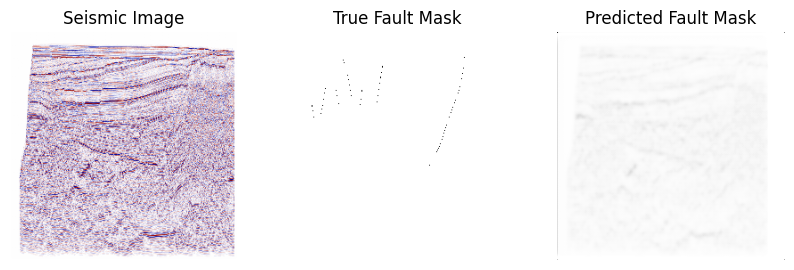

In [33]:
# Make predictions on a sample from the validation set
sample = X_val[0:1]
predictions = model.predict(sample)

# Plot the original seismic image, true fault mask, and predicted fault mask
plt.figure(figsize=(10, 10))

# Display the original seismic image
plt.subplot(1, 3, 1)
plt.imshow(sample[0], cmap='gray')
plt.title("Seismic Image")
plt.axis('off')

# Display the true fault mask
plt.subplot(1, 3, 2)
plt.imshow(y_val[0], cmap='gray')
plt.title("True Fault Mask")
plt.axis('off')

# Display the predicted fault mask
plt.subplot(1, 3, 3)
plt.imshow(predictions[0], cmap='gray')
plt.title("Predicted Fault Mask")
plt.axis('off')

plt.show()


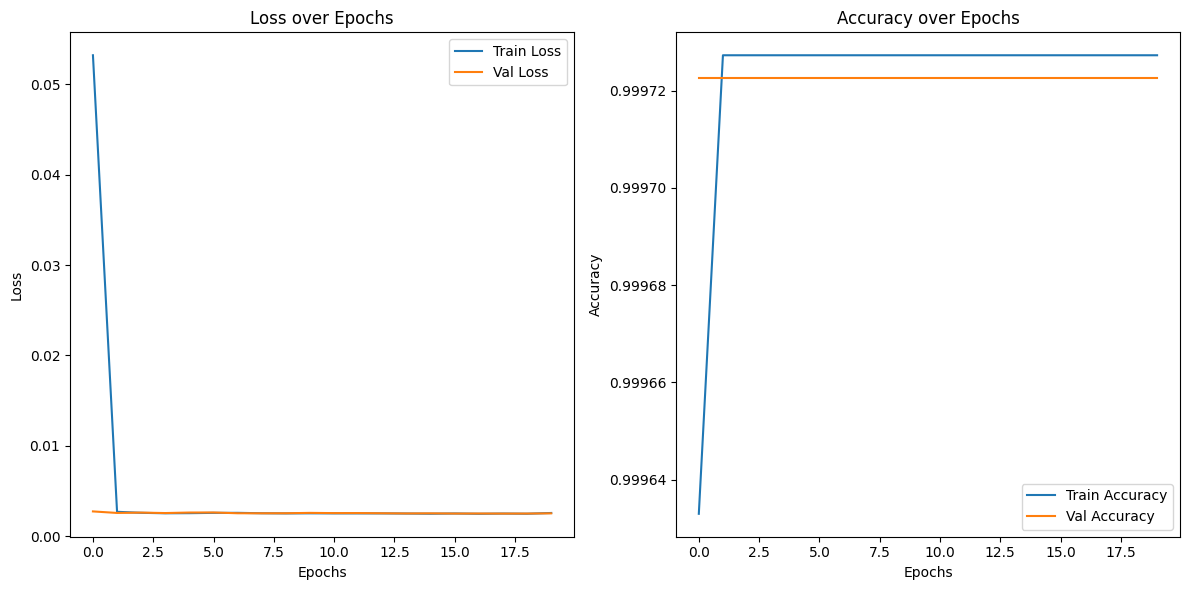

In [41]:
import matplotlib.pyplot as plt

# Plotting training & validation loss and accuracy
def plot_training_history(history):
    # Plotting loss
    plt.figure(figsize=(12, 6))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [36]:
model.save("unet_seismic_fault_detection.h5")

In [38]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("unet_seismic_fault_detection.h5")


In [40]:
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img

# Load the test image
test_image_path = "seismics1/seismic-1200.png"
test_image = load_img(test_image_path, target_size=(256, 256), color_mode='grayscale')  # Adjust as needed
test_image = img_to_array(test_image)
test_image = test_image / 255.0  # Normalize
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


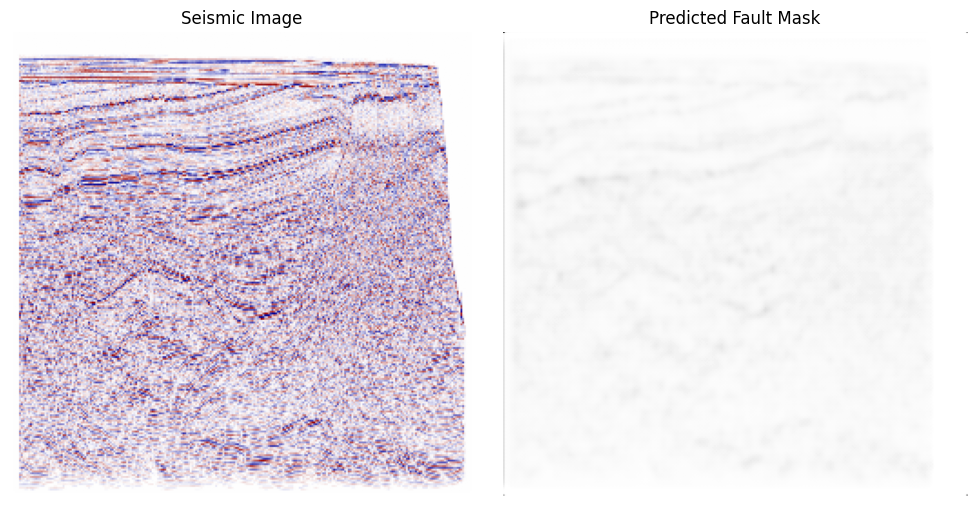

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the seismic image and the model
image_path = r"seismic-1464.png"
model_path = r"unet_seismic_fault_detection.h5"

# Function to load and preprocess a single image
def load_single_image(image_path, img_size=(256, 256)):
    # Load the seismic image and preprocess it
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the single image
sample_image = load_single_image(image_path)

# Load the trained model
model = load_model(model_path)

# Make predictions on the image
predicted_mask = model.predict(sample_image)

# Visualize the seismic image and its predicted fault mask
plt.figure(figsize=(10, 5))

# Display the original seismic image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0], cmap='gray')
plt.title("Seismic Image")
plt.axis('off')

# Display the predicted fault mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')  # Remove batch and channel dimensions
plt.title("Predicted Fault Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
predicted_mask

array([[[[0.99343836],
         [0.99949294],
         [0.99986196],
         ...,
         [0.9999767 ],
         [0.9998824 ],
         [0.9964644 ]],

        [[0.99972165],
         [0.9999956 ],
         [0.9999987 ],
         ...,
         [1.        ],
         [0.9999997 ],
         [0.9999226 ]],

        [[0.99989474],
         [0.9999981 ],
         [0.99999934],
         ...,
         [1.        ],
         [1.        ],
         [0.9999913 ]],

        ...,

        [[0.9999706 ],
         [0.9999998 ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [0.99999684]],

        [[0.9999481 ],
         [0.9999995 ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [0.9999779 ]],

        [[0.9984953 ],
         [0.9999339 ],
         [0.9999876 ],
         ...,
         [0.99999577],
         [0.9999724 ],
         [0.99780446]]]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


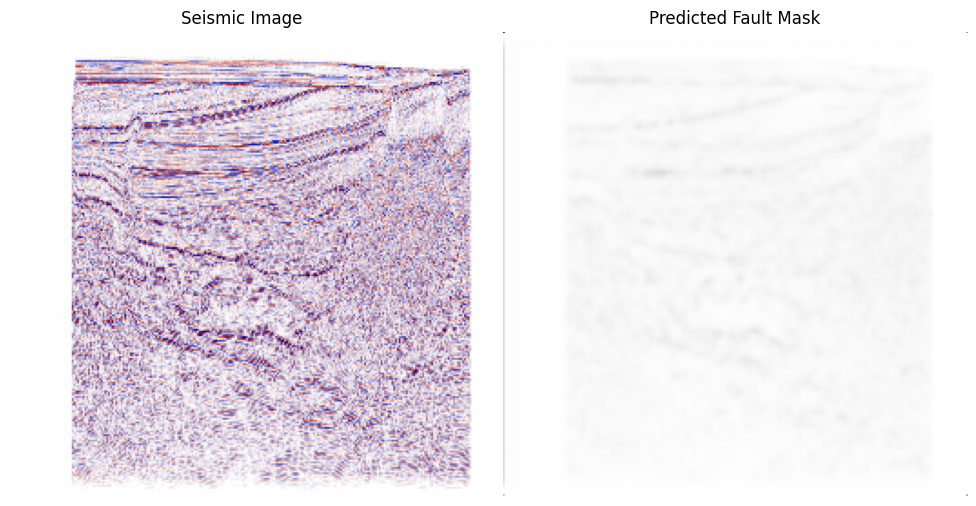

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the seismic image and the model
image_path = r"seismic-1464.png"
model_path = r"unet_seismic_fault_detection.h5"

# Function to load and preprocess a single image
def load_single_image(image_path, img_size=(256, 256)):
    # Load the seismic image and preprocess it
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the single image
sample_image = load_single_image(image_path)

# Load the trained model
model = load_model(model_path)

# Make predictions on the image
predicted_mask = model.predict(sample_image)

# Visualize the seismic image and its predicted fault mask
plt.figure(figsize=(10, 5))

# Display the original seismic image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0], cmap='gray')
plt.title("Seismic Image")
plt.axis('off')

# Display the predicted fault mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')  # Remove batch and channel dimensions
plt.title("Predicted Fault Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


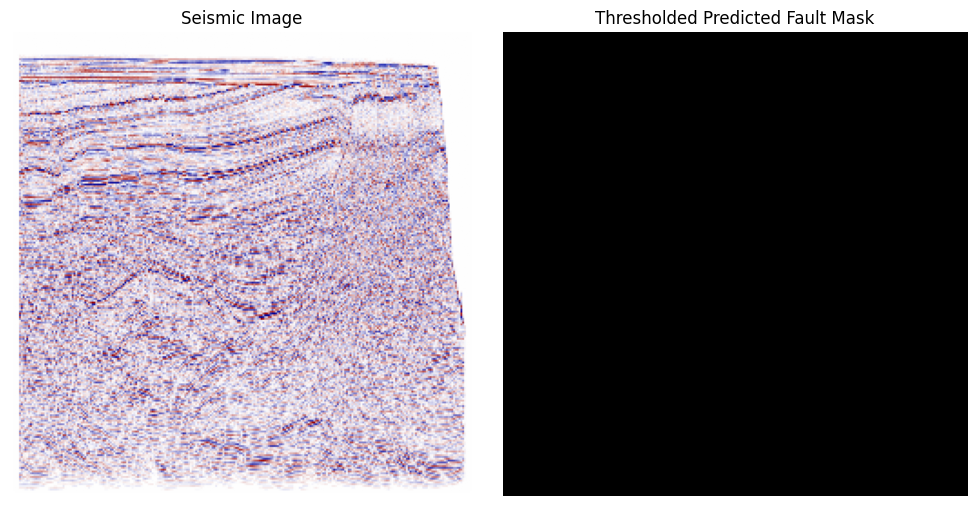

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the seismic image and the model
image_path = r"seismic-1464.png"
model_path = r"unet_seismic_fault_detection.h5"

# Function to load and preprocess a single image
def load_single_image(image_path, img_size=(256, 256)):
    # Load the seismic image and preprocess it
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the single image
sample_image = load_single_image(image_path)

# Load the trained model
model = load_model(model_path)

# Make predictions on the image
predicted_mask = model.predict(sample_image)

# Apply thresholding
threshold = 0.99343836
binary_mask = np.where(predicted_mask >= threshold, 1, np.where(predicted_mask > 0, 1, 0))  # Update

# Visualize the seismic image and its predicted fault mask
plt.figure(figsize=(10, 5))

# Display the original seismic image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0], cmap='gray')
plt.title("Seismic Image")
plt.axis('off')

# Display the thresholded predicted fault mask
plt.subplot(1, 2, 2)
plt.imshow(binary_mask[0, :, :, 0], cmap='gray')  # Remove batch and channel dimensions
plt.title("Thresholded Predicted Fault Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
